In [60]:
import dlib
import os
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [61]:
face_detec = dlib.get_frontal_face_detector()
point_detec = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
descpritor_face_extact = dlib.face_recognition_model_v1("dlib_face_recognition_resnet_model_v1.dat")

In [62]:
index = {}
idx = 0
faces_descrytors = None

images = []

paths = [os.path.join('yalefaces/train', f) for f in os.listdir('yalefaces/train')]
for path in paths:
  image = Image.open(path).convert('RGB')
  image_np = np.array(image, 'uint8')

  detecs = face_detec(image_np, 1)
  for face in detecs:

    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(image_np, (l, t), (r, b), (0, 255, 0), 2)

    pontos = point_detec(image_np, face)
    for ponto in pontos.parts():
      cv2.circle(image_np, (ponto.x, ponto.y), 2, (0, 0, 255), 2)
  
    descritor_facial = descpritor_face_extact.compute_face_descriptor(image_np, pontos)
    descritor_facial = [df for df in descritor_facial]
    descritor_facial = np.array(descritor_facial, dtype=np.float64)
    descritor_facial = descritor_facial[np.newaxis, :]

    if faces_descrytors is None:
      faces_descrytors = descritor_facial
    else:
      faces_descrytors = np.concatenate((faces_descrytors, descritor_facial), axis=0)

  index[idx] = path
  idx += 1

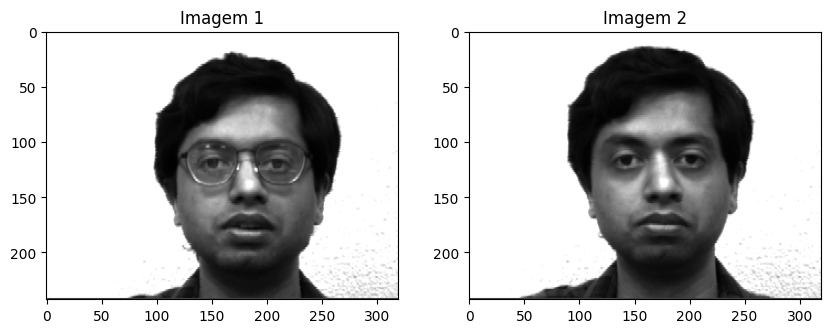

In [67]:
removed_idx = 6
new_index = {key: value for key, value in index.items() if key != removed_idx}
new_faces_descriptors = np.delete(faces_descrytors, removed_idx, axis=0)

target_descriptor = faces_descrytors[removed_idx]
imgId = np.argmin(np.linalg.norm(new_faces_descriptors - target_descriptor, axis=1))

# Ajustar imgId para refletir o índice correto no dicionário original
adjusted_imgId = list(new_index.keys())[imgId]

# Carregar as imagens correspondentes
image1 = Image.open(index[removed_idx]).convert('RGB')
image2 = Image.open(index[adjusted_imgId]).convert('RGB')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title('Imagem 1')
plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.title('Imagem 2')
plt.show()


In [64]:
plt.figure(figsize=(20, 20))
columns = 4
rows = (len(images) + columns - 1) // columns

for i, image in enumerate(images):
    plt.subplot(rows, columns, i + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

<Figure size 2000x2000 with 0 Axes>